### Name: Yangyang Dai

### PS 2

In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

1) a

In [106]:
bq_data = np.loadtxt('BQmat_orig.txt', delimiter=',')
bq_data.view()

array([[0.00000000e+00, 2.83821991e-04, 6.02760667e-04, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.78678994e-04, 3.49568070e-04, 0.00000000e+00, 8.23400392e-06,
        8.34493170e-06, 2.51913214e-05, 0.00000000e+00],
       [4.47625680e-04, 9.70091124e-05, 0.00000000e+00, 0.00000000e+00,
        1.20441636e-04, 4.74592862e-04, 1.11411735e-02],
       [8.77122467e-05, 1.97168377e-05, 1.67393465e-04, 3.37768206e-04,
        0.00000000e+00, 0.00000000e+00, 7.68656636e-05],
       [1.30667055e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 8.30857801e-05, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.17250614e-04,
        0.00000000e+00, 7.51155655e-05, 2.88012798e-03],
       [5.91784831e-04, 0.00000000e+00, 1.20779289e-04, 1.07985346e-03,
        2.87617222e-04, 7.84117928e-05, 0.00000000e+00],
       [7.39362157e-05, 9.51050861e-06, 0.00000000e+00, 9.39006019e-06,
        2.84515843e-05, 9

In [107]:
X = np.arange(18,96)
Y = np.arange(1,8)
Y,X = np.meshgrid(Y,X)

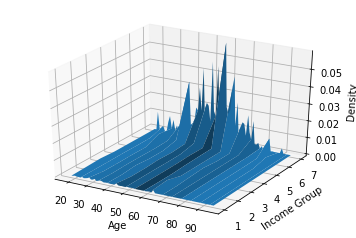

In [108]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, bq_data, rstride =5)
ax.set_xlabel('Age')
ax.set_ylabel('Income Group')
ax.set_zlabel('Density')
plt.show()

1) b

In [109]:
from scipy.stats import gaussian_kde

In [110]:
ages_vec = np.arange(18, 96)
abils_vec = np.arange(1,8)
abils_midpt = np.array([0.125, 0.375, 0.60, 0.75, 0.85, 0.94, 0.995])

In [111]:
bandwidth = 2.0

prop_mat_inc = np.sum(bq_data, axis=0)
prop_mat_age = np.sum(bq_data, axis=1)
lrg_samp = 70000
age_probs = np.random.multinomial(lrg_samp, prop_mat_age)
income_probs = np.random.multinomial(lrg_samp, prop_mat_inc)
age_freq = np.array([])
inc_freq = np.array([])

# creating a distribution of age values
for age, num_s in zip(ages_vec, age_probs):
    vec_age_s = np.ones(num_s)
    vec_age_s *= age
    age_freq = np.append(age_freq, vec_age_s)

# creating a distribution of ability type values
for abil, num_j in zip(abils_midpt, income_probs):
    vec_abil_j = np.ones(num_j)
    vec_abil_j *= abil
    inc_freq = np.append(inc_freq, vec_abil_j)

data = np.vstack((age_freq, inc_freq))
density = gaussian_kde(data, bw_method=bandwidth)

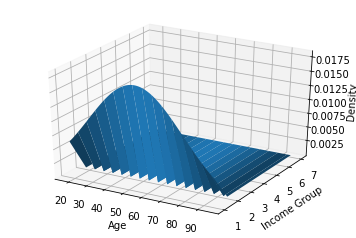

In [112]:
abils_mat, ages_mat = np.meshgrid(abils_vec, ages_vec)
coords = np.vstack([item.ravel() for item in [ages_mat, abils_mat]])
BQkde = density(coords).reshape(ages_mat.shape)
BQkde_scaled = BQkde / BQkde.sum()
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(ages_mat, abils_mat, BQkde_scaled, rstride =5)
ax.set_xlabel('Age')
ax.set_ylabel('Income Group')
ax.set_zlabel('Density')
plt.show()

In [113]:
print("The estimated density of bequest recipients who are 61 and in the 6th lifetime income category is: \n{}".format(BQkde_scaled[61,6]))

The estimated density of bequest recipients who are 61 and in the 6th lifetime income category is: 
2.7975067294285037e-171


if we set the bandwidth to 2, the The estimated density of bequest recipients who are 61 and in the 6th lifetime income category is very small, almost close to 0.

2） a

In [114]:
biden_df = pd.read_csv("biden.csv")

In [115]:
biden_df.head()

,biden,female,age,educ,dem,rep
0,90.0,0,19.0,12.0,1.0,0.0
1,70.0,1,51.0,14.0,1.0,0.0
2,60.0,0,27.0,14.0,0.0,0.0
3,50.0,1,43.0,14.0,1.0,0.0
4,60.0,1,38.0,14.0,0.0,1.0


In [116]:
biden_df["educ"].value_counts()

12.0    725
14.0    328
16.0    289
13.0    244
17.0    243
11.0    128
15.0    104
10.0     85
9.0      58
8.0      42
6.0      26
7.0      12
5.0      10
3.0       7
4.0       5
1.0       3
0.0       2
2.0       1
Name: educ, dtype: int64

In [117]:
biden_df["age"].max()

93.0

In [118]:
biden_df["const"] = 1
biden_df["age_educ"] = biden_df["age"]*biden_df["educ"]
X = ["const", "age", "educ", "age_educ"]
reg = sm.OLS(biden_df["biden"], biden_df[X], missing='drop', hasconst=True)

In [119]:
reg_results = reg.fit()

In [120]:
reg_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  biden   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     10.13
Date:                Sun, 29 Apr 2018   Prob (F-statistic):           1.29e-06
Time:                        23:31:02   Log-Likelihood:                -8333.3
No. Observations:                1826   AIC:                         1.667e+04
Df Residuals:                    1822   BIC:                         1.670e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         37.5491      9.491      3.956      0.000      18.935      56.163
age            0.6674      0.169      3.950      0.000       0.336       0.999
educ           1.7123      0.709      2.414      0.016       0.321       3.103
age_educ      -0.0477      0.013     -3.728      0.000      -0.073      -0.023
==============================================================================
Omnibus:                       64.792   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               70.979
Skew:                          -0.480   Prob(JB):                     3.86e-16
Kurtosis:                       3.105   Cond. No.                     1.19e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.19e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

From the table above, we can see that age's marginal effect on $Y$ is 0.667 − 0.0477$X_2$. As education increases, the positive effect of age on feelings towards Biden decreases. 
Also, all the variables are significant at the 0.01 level.

In [121]:
vcv = reg_results.cov_params()
point_estimate_age = reg_results.params[2]+ reg_results.params[3]
t_statistic_age = point_estimate_age / reg_results.HC0_se[1]
t_statistic_age

10.665705985337697

the large t statistics indicates a high statistical significance of < 0.005 (df > 1000) for the marginal effect of age by education.

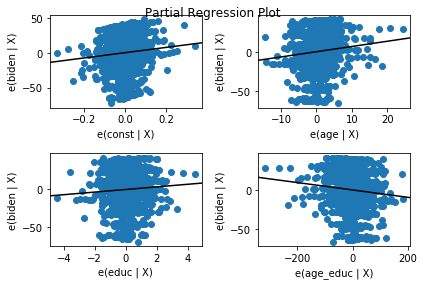

In [126]:
import seaborn as sns
import statsmodels.api as sm
fig = plt.figure()
sm.graphics.plot_partregress_grid(reg_results,fig=fig)

We can see that from the partial regression plots that the relative slopes represent the marginal effects of each variable conditional on the others.

2) b

In [127]:
point_estimate_educ = reg_results.params[1] + reg_results.params[3]

In [128]:
t_statistic_educ = point_estimate_educ / reg_results.HC0_se[2]
t_statistic_educ

0.9451330562351634

The estimated pointwise t-statistic indicates that the marginal effect of education is not statistically significant (df > 1000).